In [2]:
import os
from qiskit import *
import qiskit.tools.visualization as qt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')

circuit_c = QuantumCircuit(qreg_q, creg_c)
circuit_b = QuantumCircuit(qreg_q, creg_c)

In [4]:
circuit_c.reset(qreg_q[0])
circuit_c.x(qreg_q[1])

circuit_c.barrier()

circuit_c.h(qreg_q[0])
circuit_c.h(qreg_q[1])
circuit_c.x(qreg_q[0])
circuit_c.x(qreg_q[1])
circuit_c.h(qreg_q[0])
circuit_c.h(qreg_q[1])

circuit_c.barrier()

circuit_c.measure(qreg_q[0], creg_c[0])

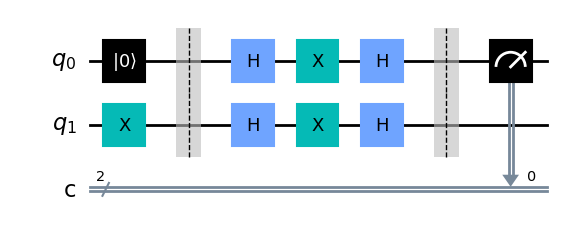

In [5]:
circuit_c.draw(output="mpl")

In [6]:
circuit_b.reset(qreg_q[0])
circuit_b.x(qreg_q[1])

circuit_b.barrier()

circuit_b.h(qreg_q[0])
circuit_b.h(qreg_q[1])
circuit_b.cx(qreg_q[0], qreg_q[1])
circuit_b.h(qreg_q[0])
circuit_b.h(qreg_q[1])

circuit_b.barrier()

circuit_b.measure(qreg_q[0], creg_c[0])

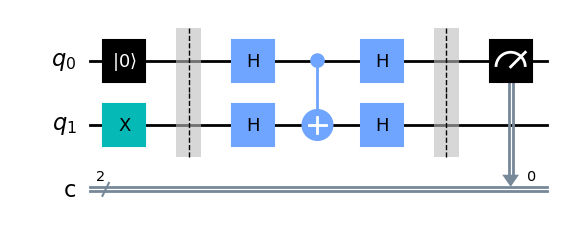

In [7]:
circuit_b.draw(output="mpl")

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit_b, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'01': 1}


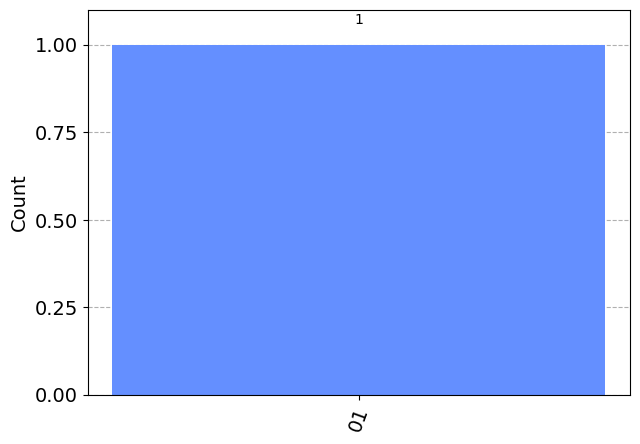

In [9]:
qt.plot_histogram(counts)